In [594]:
import numpy as np
from numpy import random as rand
%matplotlib inline
import matplotlib.pyplot as plt

In [595]:
def computeCost(X, y, theta):
    m = X.shape[0]
    J = (1 / 2 * m) * sum(sum(((X.dot(theta) - y)**2)))
    return J

In [596]:
def normalizeFeature(X): 
    samples, features = X.shape
    
    mu_vec = np.mean(X, axis=0)
    sigma_vec = np.std(X, axis=0)
    
    mu = np.reshape(mu_vec, (1, features))
    sigma = np.reshape(sigma_vec, (1, features))
    
    mu_temp = np.ones((samples, 1)).dot(mu)
    sigma_temp = np.ones((samples, 1)).dot(sigma)
    
    return (X - mu_temp) / sigma_temp, mu, sigma

In [597]:
def gradientDescent(X, y, theta, alpha, num_iters):
    print("theta in shape ", theta.shape)
    print("theta in ", theta)
    samples, features = X.shape
    
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        t_sum = sum((X.dot(theta) - y) * X)
        #print("sum  ", t_sum)
        #t_sum = np.reshape(1, 1)
        
        theta = theta - (alpha / samples) * np.reshape(t_sum, theta.shape)
        
        J_history[i] = computeCost(X, y, theta)
        
    print("theta out ", theta)
    print("theta out shape ", theta.shape)
    return J_history, theta

In [656]:
alpha = 0.01
num_iters = 300

In [657]:
#data = np.genfromtxt("stockholm_td_adj.dat")
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data

In [664]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [685]:
X = boston.data[:,12:13]
y = boston.target

samples, features = X.shape

In [686]:
#X = np.reshape(X, (samples, 1))
#y = np.reshape(y, (samples, 1))
X.shape

(506, 1)

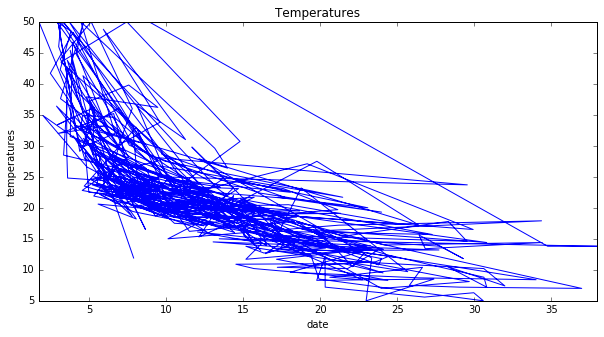

In [687]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X, y)
ax.axis('tight')
ax.set_title('Temperatures')
ax.set_xlabel('date')
ax.set_ylabel('temperatures');

In [688]:
theta = np.zeros((features + 1, 1))
theta.shape

(2, 1)

In [644]:
X_norm, mu, sigma = normalizeFeature(X)
X_norm = np.hstack((np.ones((samples, 1)), X_norm))

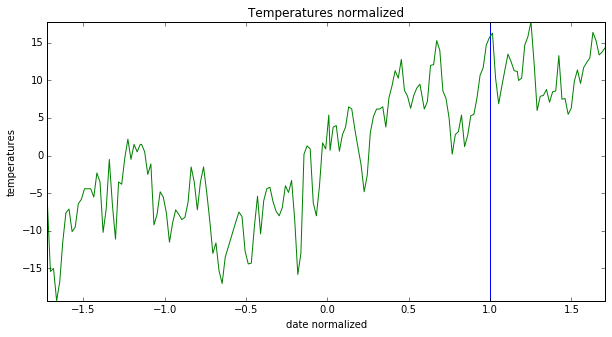

In [645]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X_norm, y)
ax.axis('tight')
ax.set_title('Temperatures normalized')
ax.set_xlabel('date normalized')
ax.set_ylabel('temperatures');

In [646]:
J_history, theta = gradientDescent(X_norm, y, theta, alpha, num_iters)
theta

theta in shape  (2, 1)
theta in  [[ 0.]
 [ 0.]]
theta out  [[ 0.90288284]
 [ 6.87266397]]
theta out shape  (2, 1)


array([[ 0.90288284],
       [ 6.87266397]])

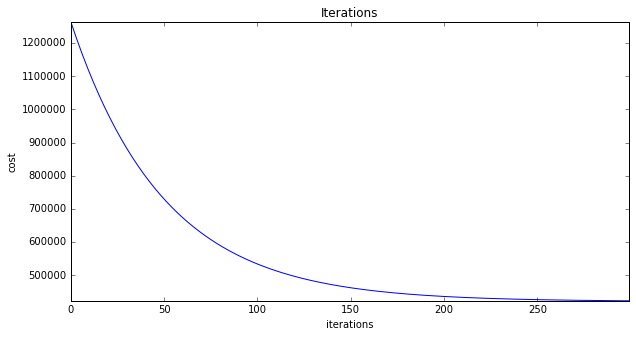

In [647]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(J_history.size), J_history)
ax.axis('tight')
ax.set_title('Iterations')
ax.set_xlabel('iterations')
ax.set_ylabel('cost');

In [648]:
new_date = np.array([1800, 8, 2])
new_date_val = new_date[0] + new_date[1] / 12 + new_date[2]/365
print(new_date_val)
new_x_norm = (new_date_val - mu) / sigma
new_x = np.hstack((np.ones((1, 1)), new_x_norm))
theta

1800.67214612


array([[ 0.90288284],
       [ 6.87266397]])

In [649]:
predicted_temp = new_x.dot(theta)

In [650]:
predicted_temp

array([[ 17.06836998]])